# 📘 DIS Final Exam - Fall 2023

**🎉 Welcome to DIS Final exam that takes place on the 30th of January 2024.**

> Please fill the following info:
> - Your Name: Alexi Semiz
> - Your SCIPER: 368603

<div style="padding:15px 15px 15px 15px;border-left:3px solid #b7b7b7ff;background-color:#eeeeeeff;border-radius: 15px;color:black;">

## Rename your notebook with your SciperNo

#### 🎯 **GOAL:** The final sumbitted file should have the following name: `SciperNo.ipynb`

</div>

<div style="padding:15px 15px 15px 15px;border-left:3px solid #b7b7b7ff;background-color:#eeeeeeff;border-radius: 15px;color:black;">

## THE TASK

You are given a set of documents that you need to analyze and compare.

You will need to:
- Explore and understand the data
- Vectorize the documents with two encoding methods
- Create two graphs based on the similarity of the two types of embeddings
- Find the communities in the graphs
- Compare the communities between the two graphs

##### Structure/ Overview of the exam

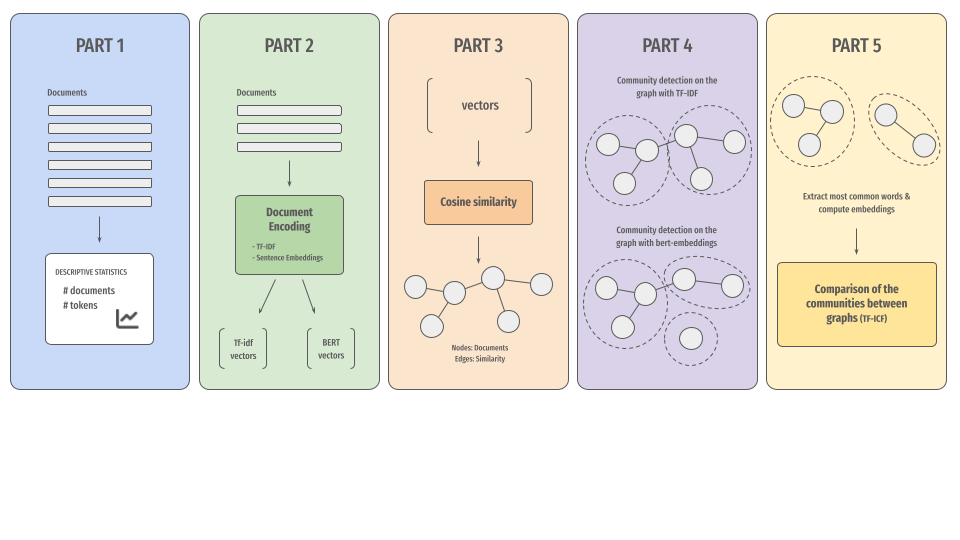


## THE DATA

The columns of the provided data are the following:

- `_id`: the id of a document
- `document`: the text of a document

</div>

### 🍀 GOOD LUCK 🍀

<div style="padding:15px 15px 15px 15px;border-left:3px solid #b7b7b7ff;background-color:#eeeeeeff;border-radius: 15px;color:black;">

#### Structure of the exam & Quick access

- [PART 1: Data Descriptives](#part1)
    - [1.1 Compute the size of the dataset and the average, max and min document length of the dataset](#part11)
    - [1.2 Create the vocabulary of the corpus and find the top-10 most used tokens](#part12)
    - [1.3 Plot the histogram of the lengths of the documents](#part13)

- [PART 2: Document vectorization](#part2)
    - [2.1 Compute the term-document frequency matrix (TF) for the given documents](#part21)
    - [2.2 Compute the inverse document matrix (IDF) for the given documents](#part22)
    - [2.3 Vectorize the documents using the TF-IDF method](#part23)
    - [2.4 Vectorize the documents using sentence embeddings method](#part24)


- [PART 3: Graph creation](#part3)
    - [3.1  Implement the cosine similarity function of 2 vectors](#part31)
    - [3.2 Implement a function that creates a graph using the given document vectors and a given similarity threshold](#part32)
    - [3.3 Implement a function to compute the connectivity of a given graph](#part33)
    - [3.4 Create a graph using the TF-IDF vectors and threshold `t=0.2`](#part34)
    - [3.5 Create a graph using the sentence embedding vectors and threshold `t=0.75`](#part35)
    - [3.6 Find the connectivity of the Bert Embeddings graph for different similarity thresholds](#part36)


- [PART 4: Community detection](#part4)
    - [4.1 Implement a function to compute the communities in a given graph](#part41)
    - [4.2 Compute the communities for the TFIDF graph & the modularity](#part42)
    - [4.3 Compute the communities for the BERT graph & the modularity](#part43)


- [PART 5: Compare the communities of the graphs](#part5)
    - [5.1 Implement a function to get the size of each community in a graph](#part51)
    - [5.2 Implement a function to concatenate all documents for a given community](#part52)
    - [5.3 Implement a function to compute TF-ICF in a given graph](#part53)
    - [5.4 Find the largest community of the BERT embeddings graph](#part54)
    - [5.5 Find the largest community of the TF-IDF graph](#part55)
    - [5.6 Compare the communities of the two graphs](#part56)

</div>

In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import math
from sentence_transformers import SentenceTransformer
import networkx as nx
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import nltk
from unidecode import unidecode
from sknetwork.clustering import Louvain

In [2]:
documents = pd.read_json('data/documents.jsonl')

<a id='part1'></a>

<div style="padding:15px 15px 15px 15px;border-left:3px solid #0b5394ff;background-color:#3d85c6ff;border-radius: 15px;color:white;">

## 1. Data Descriptives

#### 🎯 **GOAL:** Understand the dataset by exploring data statistics.

</div>

In [3]:
# Utility functions - NOTHING TO CHANGE HERE
stemmer = PorterStemmer()

# Tokenize, stem a document
def clean_text(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    return " ".join([stemmer.stem(word.lower()) for word in tokens if unidecode(word) not in stopwords.words('english')])

documents['original_document'] = documents['document']
documents['document'] = documents['original_document'].apply(clean_text)
documents.head()

,_id,document,original_document
0,1867825,invent cotton gin cotton becam americaâ lead c...,after the invention of the cotton gin cotton b...
1,419610,timer separ night day outlet nice time set rot...,timer has separate night and day outlets which...
2,4614226,rosebuy public still encount wide varieti pric...,the rosebuying public still encounters a wide ...
3,4108603,map wendov aut airport detail map wendov aut a...,map of wendover aut airport a detailed map of ...
4,3744854,poem reaper cotton song indic black labor prod...,and as the poems reapers and cotton song indic...


<a id='part11'></a>
<div style="padding:15px 15px 15px 15px;border-left:3px solid #0b5394ff; background-color:#eff7fe;border-radius: 15px;">

#### **1.1** Compute the size of the dataset and the average, max and min document length in the dataset.

</div>

In [4]:
documents

,_id,document,original_document
0,1867825,invent cotton gin cotton becam americaâ lead c...,after the invention of the cotton gin cotton b...
1,419610,timer separ night day outlet nice time set rot...,timer has separate night and day outlets which...
2,4614226,rosebuy public still encount wide varieti pric...,the rosebuying public still encounters a wide ...
3,4108603,map wendov aut airport detail map wendov aut a...,map of wendover aut airport a detailed map of ...
4,3744854,poem reaper cotton song indic black labor prod...,and as the poems reapers and cotton song indic...
...,...,...,...
495,98919,irrrl need certifi previous occupi loan may ex...,for an irrrl you need only certify that you pr...
496,5901533,nation averag gross weekli salari full time li...,â the national average gross weekly salary for...
497,5009888,link slang definit link term web page blog ins...,link to this slang definition to link to this ...
498,6542890,pleas tri later tour distilleri fiveday blitz ...,please try again later we toured distilleries...


In [8]:
list(documents["document"].apply(lambda x: len(x)).values)

[111,
 155,
 115,
 217,
 281,
 161,
 171,
 190,
 208,
 221,
 275,
 169,
 188,
 191,
 146,
 251,
 374,
 355,
 151,
 150,
 153,
 334,
 163,
 204,
 155,
 116,
 299,
 463,
 280,
 195,
 135,
 213,
 181,
 176,
 153,
 220,
 198,
 166,
 194,
 161,
 140,
 126,
 413,
 188,
 382,
 130,
 196,
 283,
 117,
 151,
 124,
 195,
 130,
 311,
 202,
 197,
 271,
 175,
 190,
 152,
 162,
 119,
 201,
 150,
 117,
 170,
 81,
 159,
 174,
 175,
 124,
 150,
 178,
 162,
 196,
 191,
 177,
 209,
 213,
 203,
 127,
 192,
 155,
 284,
 184,
 42,
 235,
 127,
 161,
 165,
 329,
 164,
 194,
 160,
 158,
 189,
 113,
 136,
 286,
 166,
 146,
 297,
 176,
 359,
 166,
 125,
 150,
 463,
 149,
 281,
 162,
 258,
 143,
 159,
 197,
 93,
 359,
 155,
 162,
 276,
 169,
 200,
 113,
 161,
 376,
 229,
 213,
 142,
 200,
 156,
 197,
 131,
 175,
 294,
 156,
 202,
 122,
 149,
 109,
 163,
 166,
 129,
 133,
 188,
 241,
 63,
 324,
 143,
 217,
 209,
 344,
 164,
 153,
 129,
 172,
 217,
 145,
 132,
 185,
 139,
 127,
 209,
 161,
 100,
 113,
 224,
 155,
 1

In [9]:
# --------------
# YOUR CODE HERE
number_of_documents = len(documents)
lengths = documents["document"].apply(lambda x: len(x)).values

avg_document_length = np.mean(lengths)
min_document_length = min(lengths)
max_document_length = max(lengths)
# --------------

In [10]:
print('Total number of documents: {}'.format(number_of_documents))
print('Avg document length: {:.1f} (min: {} - max: {})'.format(avg_document_length, 
                                                               min_document_length, 
                                                               max_document_length))
print('\n'*2)

Total number of documents: 500
Avg document length: 196.6 (min: 41 - max: 570)





<a id='part12'></a>
<div style="padding:15px 15px 15px 15px;border-left:3px solid #0b5394ff; background-color:#eff7fe;border-radius: 15px;">

#### **1.2** Create the vocabulary of the corpus and find the top-10 most used tokens (i.e. words).


_Hint: the vocabulary should be a dict, with keys: the terms and values: the number of times they appear in the corpus._

</div>

In [175]:
documents['document'][:2].str.cat(sep=' ')

'medium rare cook pork shoulder meat held 135â°f 572â°c medium cook meat done 145â°f 628â°c tradit well done shoulder desir cook 155â°f 683â°c matter temperatur rang use pork shoulder cook 1 2 day crisp well done outer part sou vide pork shoulder may finish sear grill torch accord modernist cook made easi emphasi ad hardboil like egg 165â°f sousvid egg well thi ideal temperatur egg salad distinct chunk tender nonrubberi egg loo white opaqu firm still tender tight white opaqu firm still tender'

In [20]:
all_docs=documents['document'].str.cat(sep=' ').split(' ')
vocabulary = Counter(all_docs)

In [25]:
# --------------
# YOUR CODE HERE
all_docs=documents['document'].str.cat(sep=' ').split(' ')
vocabulary = Counter(all_docs)
top_10 = vocabulary.most_common(10)
# --------------

In [26]:
print('Number of words: {}'.format(len(vocabulary)))
print()
print('10 most frequent words:')
for top in top_10:
    print(top)

print('\n'*2)

Number of words: 4749

10 most frequent words:
('use', 97)
('year', 79)
('one', 59)
('time', 56)
('may', 51)
('also', 51)
('caus', 50)
('cost', 49)
('make', 44)
('includ', 42)





<a id='part13'></a>
<div style="padding:15px 15px 15px 15px;border-left:3px solid #0b5394ff; background-color:#eff7fe;border-radius: 15px;">

#### **1.3** Plot the histogram of the lengths of the documents.


</div>

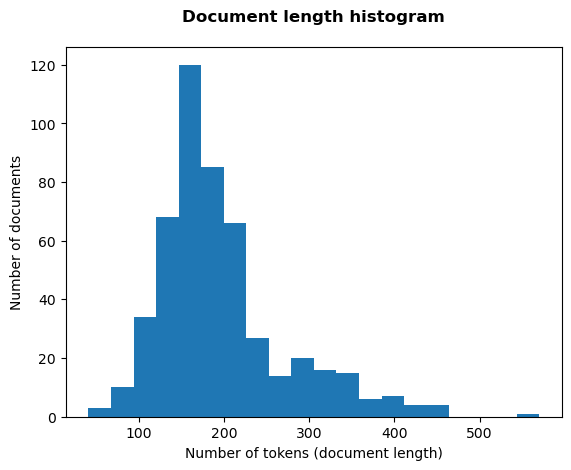

In [27]:
# --------------
# create the histogram
plt.hist(lengths, bins=20)
# --------------

plt.title('Document length histogram\n',
          fontweight = "bold")

plt.ylabel('Number of documents')
plt.xlabel('Number of tokens (document length)')
plt.show()

print('\n'*4)

<a id='part2'></a>

<div style="padding:15px 15px 15px 15px;border-left:3px solid #38761dff;background-color:#6aa84fff;border-radius: 15px;color:white;">

## 2. Document vectorization

#### GOAL: Encode each document in the dataset with the following methods:
- tf-idf
- sentence embeddings (bert embeddings)

</div>

<a id='part21'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #38761dff;background-color:#e4fae4;border-radius: 15px;">

#### **2.1:** Compute the term-document frequency matrix (TF) for the given documents.

</div>

In [47]:
def get_tf(documents, vocabulary):
    """
    It creates the term-frequency matrix with rows the terms of the vocabulary and columns the number of documents.
    Each value of the matrix represents the frequency of a term (row) in a document (column).
    Example:
    
    > INPUT:
    documents:
    Doc1: hello hello world
    Doc2: hello friend
    
    voc: 
    [hello, world, friend]
    
    > OUPUT:    
    [[2, 1],
    [1, 0],
    [0, 1]]
    
    :param documents: list of list of str, with the document text.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: np.array with the document-term frequencies
    """
    document_term_freq = np.zeros(shape=(len(vocabulary), len(documents)))
    # --------------
    # YOUR CODE HERE
    for d_id,doc in enumerate(documents):
        counter_doc=Counter(doc.split(' '))
        for w_id,word in enumerate(vocabulary):
            if word in counter_doc:
                document_term_freq[w_id,d_id]=counter_doc[word]
        
    

    # --------------
    
    return document_term_freq

In [49]:
tf = get_tf(documents['document'].values, vocabulary)
word = list(dict(vocabulary).keys())[0]
doc = documents['document'].values[0]
print('Number of terms: {}'.format(tf.shape[0]))
print('Number of documents: {}'.format(tf.shape[1]))
print('TF value of word: `{}` in document: `{}` is {:.3f}'.format(word, doc, tf[0, 0]))
print('\n'*3)

Number of terms: 4749
Number of documents: 500
TF value of word: `invent` in document: `invent cotton gin cotton becam americaâ lead crop cotton king america produc pound cotton product increas pound` is 1.000






<a id='part22'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #38761dff;background-color:#e4fae4;border-radius: 15px;">

#### **2.2:** Compute the inverse document matrix (IDF) for the given documents.

</div>

In [241]:
# compute IDF, storing idf values in a dictionary
def get_idf(documents, vocabulary):
    """
    It computes IDF scores, storing idf values in a dictionary.
    
    :param documents: list of list of str, with the document text.
    :param vocabulary: dict with the vocabulary (computed in 1.1) and each term's frequency.
    :return: dict with the terms as keys and values the idf for each term.
    """
    # --------------
    # YOUR CODE HERE
    c={word:0 for word in vocabulary}
    for doc in documents:
        unique_words=set(doc.split(' '))
        for word in unique_words:
            c[word]=c[word]+1

    n=len(documents)
    idf={word:np.log(n/c[word]) for word in c}
    # --------------
    return idf

In [238]:
idf = get_idf(documents['document'].values, vocabulary)
word = list(dict(vocabulary).keys())[0]
print('Number of terms: {}'.format(len(idf)))
print('TF value of word: `{}` is {:.3f}'.format(word, idf[word]))
print('\n'*3)

KeyError: 'crisp'

<a id='part23'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #38761dff;background-color:#e4fae4;border-radius: 15px;">

#### **2.3:** Vectorize the documents using the TF-IDF method.

</div>

In [65]:
# Function to generate the vector for a document (with normalisation)
def vectorize_tfidf(documents, vocabulary, tf, idf):
    """
    It takes the input text and vectorizes it based on the tf-idf formula.
    
    :param documents: list of list of str, with the document text.
    :param vocabulary: dict, with keys: the terms of all the documents and values: the number of times they appear in the corpus.
    :param idf: dict, with the terms as keys and values the idf for each term.
    :return: np.array, with the vectorized documents
    """
    # --------------
    # YOUR CODE HERE
    tfidf_vectors=np.zeros((len(documents),len(vocabulary)))
    for d_id,doc in enumerate(documents):
        unique_words=set(doc.split(' '))
        max_count=np.max(tf[:,d_id])
        for w_id,word in enumerate(vocabulary):
            if word in unique_words:
                normalized_tf=tf[w_id,d_id]/max_count
                tfidf_vectors[d_id,w_id]=normalized_tf*idf[word]


    # --------------
    return np.array(tfidf_vectors)

In [66]:
tfidf_embeddings = vectorize_tfidf(documents['document'].values, vocabulary, tf, idf)

In [67]:
len(documents)

500

In [68]:
print('Number of documents: {}'.format(tfidf_embeddings.shape[0]))
print('Number of terms: {}'.format(tfidf_embeddings.shape[1]))
print('\n'*3)

Number of documents: 500
Number of terms: 4749






<a id='part24'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #38761dff;background-color:#e4fae4;border-radius: 15px;">

#### **2.4:** Vectorize the documents using sentence embeddings method.

</div>

In [70]:
model_name = 'sentence-transformers/stsb-distilbert-base'

In [72]:
# --------------
# YOUR CODE HERE
# load the model
model = SentenceTransformer('sentence-transformers/stsb-distilbert-base')

# encode the documents
bert_embeddings = model.encode(documents.document.values)
# --------------

In [73]:
print('Number of documents: {}'.format(bert_embeddings.shape[0]))
print('Embedding dimensions: {}'.format(bert_embeddings.shape[1]))
print('\n'*3)

Number of documents: 500
Embedding dimensions: 768






<a id='part3'></a>

<div style="padding:15px 15px 15px 15px;border-left:3px solid #b45f06ff;background-color:#e69138ff;border-radius: 15px;color:white;">

## 3. Graph creation

#### GOAL: Create two graph based on the similarity of the document vectors. Each graph will be created on the embeddings of each method (tf-idf and sentence embeddings)


</div>

In [74]:
# Checkpoint - Re-load the data for the 3rd, 4th, and 5th question parts.
documents = pd.read_json('data/checkpoint_documents.jsonl')

tfidf_embeddings = np.array(list(documents['tf_embedding'].values))
bert_embeddings = np.array(list(documents['bert_mebedding'].values))

In [75]:
# Utility functions - NOTHING TO CHANGE HERE

def graph_visualization_edges(the_graph, edge_labels):
    # Visualize graph
    pos = nx.spectral_layout(the_graph)
    plt.figure()
    nx.draw(
        the_graph, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in the_graph.nodes()}
    )
    nx.draw_networkx_edge_labels(
        the_graph, pos,
        edge_labels=edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()

def graph_visualization(the_graph):
    # Visualize graph
    pos = nx.spring_layout(the_graph)
    plt.figure()
    nx.draw(
        the_graph, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in the_graph.nodes()}
    )
    plt.axis('off')
    plt.show()

<a id='part31'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #b45f06ff;background-color:#fce5cdff;border-radius: 15px;">

#### **3.1:** Implement the cosine similarity function of 2 vectors.

</div>

In [76]:
def cosine_similarity(v1, v2):
    """
    It computes cosine similarity.
    
    :param v1: list of floats, with the vector of a document.
    :param v2: list of floats, with the vector of a document.
    :return: float
    """
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxy == 0:
        sim = 0
    else:
        sim = sumxy/math.sqrt(sumxx*sumyy)
    return sim

In [77]:
print('Very similar vectors: {}'.format(cosine_similarity([1, 1, 1], [1, 1, 1])))
print('Somewhat similar vectors: : {:.2f}'.format(cosine_similarity([1, 1, 0], [1, 0, 0])))
print('Not similar vectors: {}'.format(cosine_similarity([0, 0, 0], [1, 1, 1])))
print('\n'*3)

Very similar vectors: 1.0
Somewhat similar vectors: : 0.71
Not similar vectors: 0






<a id='part32'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #b45f06ff;background-color:#fce5cdff;border-radius: 15px;">

#### **3.2:** Implement a function that creates a graph using the given document vectors and a given similarity threshold.

> The graph will have documents as nodes and edges the similarly score among the documents. 


_Tip1: while creating the graph edges, add this command `edge_labels[(node_a, node_b)] = similarity` to create a dictionary with the edges' weights for easier graph visualization. THIS TIP IS NOT MANDATORY, it will just make the visualization of the example more comprehensive. Feel free to skip it._

_Tip2: Add the document id as the node name in the graph._

</div>

In [196]:
documents._id.values[4]

2923493

In [201]:
def create_sim_graph(embedding_vectors, documents, t): 
    G=nx.Graph()
    edges_list=[]
    edge_labels={}
    # --------------
    # YOUR CODE HERE
    ids=documents._id.values
    for i in range(len(embedding_vectors)-1):
        id_i=ids[i]
        doc1_eb=embedding_vectors[i]
        for j in range(i+1,len(embedding_vectors)):
            doc2_eb=embedding_vectors[j]
            sim=cosine_similarity(doc1_eb,doc2_eb)
            if sim>t:
                id_j=ids[j]
                edges_list.append((id_i,id_j,sim))
                edge_labels[(id_i,id_j)]=sim
    G.add_weighted_edges_from(edges_list)

    # --------------
    return G, edge_labels

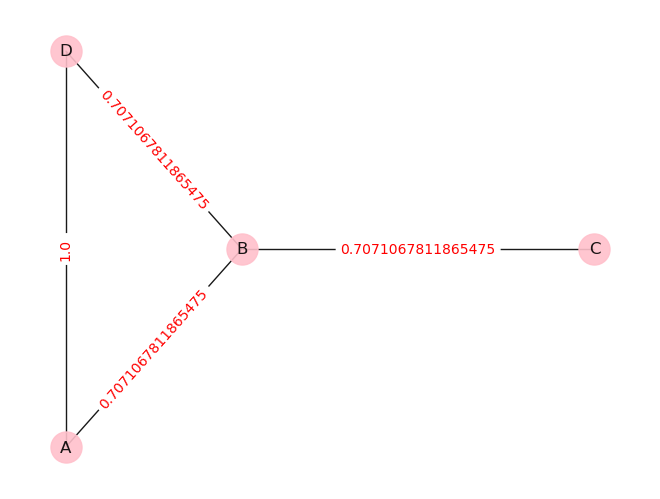

In [202]:
test_vectors = [[1, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1]]
test_docs = pd.DataFrame([{'_id': 'A'}, {'_id': 'B'}, {'_id': 'C'}, {'_id': 'D'}])
test_graph, edge_labels = create_sim_graph(test_vectors, test_docs, 0.5)
graph_visualization_edges(test_graph, edge_labels)

<a id='part33'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #b45f06ff;background-color:#fce5cdff;border-radius: 15px;">

#### **3.3:** Implement a function to compute the connectivity percentage of a given graph.

_Hint: The connectivity percentage is the percentage of the graph edges that exist in the graph compared to a fully connected graph._

</div>

In [203]:
def get_connectivity_perc(G):
    # --------------
    # YOUR CODE HERE
    n_nodes=G.number_of_nodes()
    n_edges=G.number_of_edges()
    n_edges_full_connected=n_nodes*(n_nodes-1)/2
    if n_edges==0:
        return 0
    connectivity_perc=n_edges/n_edges_full_connected
    # --------------
    

    return connectivity_perc

In [204]:
print('Connectivity of the test/example graph of question 3.2: {:.3f}'.format(get_connectivity_perc(test_graph)))
print('\n'*3)

Connectivity of the test/example graph of question 3.2: 0.667






<a id='part34'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #b45f06ff;background-color:#fce5cdff;border-radius: 15px;">

#### **3.4:** Create a graph using the TF-IDF vectors and threshold `t=0.2`.

</div>

In [206]:
# --------------
# YOUR CODE HERE
t = 0.2
tfidf_graph,edge_labels_tfidf = create_sim_graph(tfidf_embeddings,documents,t)
# --------------

In [207]:
print('Number of Nodes: {}'.format(len(tfidf_graph.nodes)))
print('Number of Edges: {}'.format(len(tfidf_graph.edges)))
print('\n'*3)

Number of Nodes: 57
Number of Edges: 116






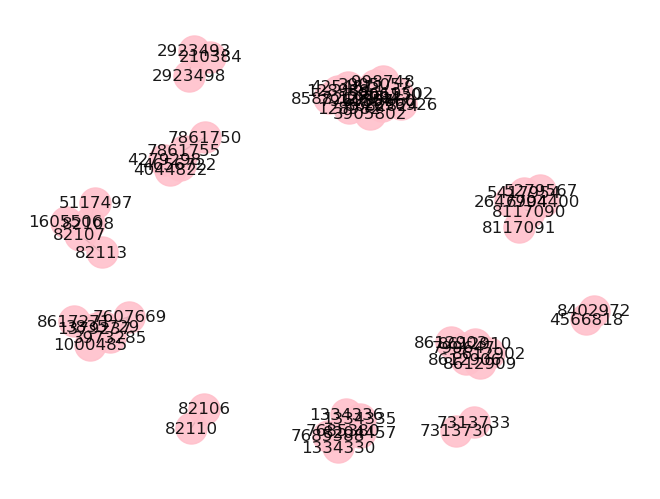

In [208]:
graph_visualization(tfidf_graph)

<a id='part35'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #b45f06ff;background-color:#fce5cdff;border-radius: 15px;">

#### **3.5:** Create a graph using the sentence embedding vectors and threshold `t=0.75`.

</div>

In [209]:
# --------------
# YOUR CODE HERE
t = 0.75
bert_graph,bert_edges_labels = create_sim_graph(bert_embeddings,documents,t)
# --------------

In [210]:
print('Number of Nodes: {}'.format(len(bert_graph.nodes)))
print('Number of Edges: {}'.format(len(bert_graph.edges)))
print('\n'*3)

Number of Nodes: 65
Number of Edges: 321






<a id='part36'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #b45f06ff;background-color:#fce5cdff;border-radius: 15px;">

#### **3.6:** Find the connectivity percentage of the Bert Embeddings graph for different similarity thresholds. How and why does this affect connectivity? Explain your answer.

</div>

In [212]:
thresholds = [0, 0.25, 0.5, 0.75, 1]
connectivities = list()
# --------------
# YOUR CODE HERE
for t in thresholds:
    bert_graph,bert_edges_labels = create_sim_graph(bert_embeddings,documents,t)
    connectivities.append(get_connectivity_perc(bert_graph))
    
# --------------

Connectivity Percentage: 0.307


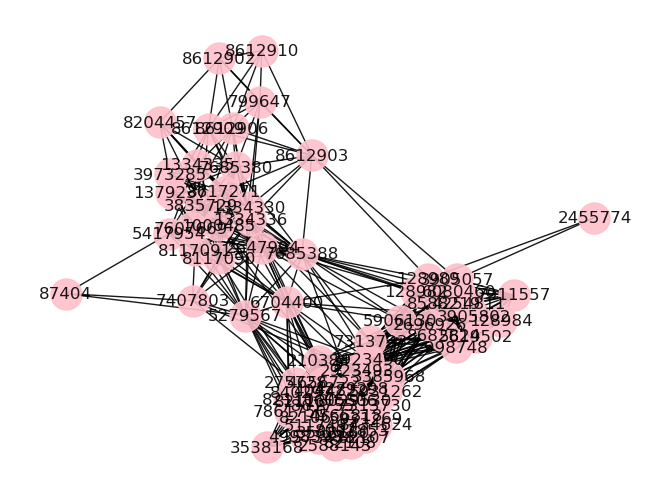

In [214]:
gr, el = create_sim_graph(bert_embeddings, documents, 0.55)
print('Connectivity Percentage: {:.3f}'.format(get_connectivity_perc(gr)))
graph_visualization(gr)

#### --------------
#### As the threshold increases, we are more severe on which document connect to others. Therefore less edges are created so the connectivity decreases.


#### --------------

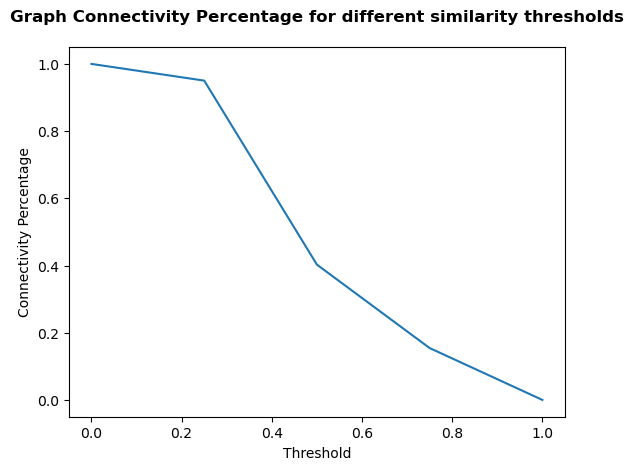

In [215]:
# visualization of the connectivity percentages
plt.plot(thresholds, np.array(connectivities))
plt.title('Graph Connectivity Percentage for different similarity thresholds\n',
          fontweight = "bold")

plt.xlabel('Threshold')
plt.ylabel('Connectivity Percentage')
plt.show()

<a id='part4'></a>
<div style="padding:15px 15px 15px 15px;border-left:3px solid #351c75ff;background-color:#674ea7ff;border-radius: 15px;color:white;">

## 4. Community detection

#### GOAL: Find the communities in the graphs.

</div>

<a id='part41'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #351c75ff;background-color:#d9d2e9ff;border-radius: 20px;">

#### **4.1:** Implement a function to compute the communities in a given graph. 

_Hint: Please use from `sknetwork.clustering` the `Louvain` algorithm._

</div>

In [142]:
from sknetwork.clustering import get_modularity

In [186]:
def find_communities(the_graph):
    """
    For a given graph, you need to perform modularity clustering and return the communities of the nodes.
    
    EXAMPLE OUTPUT: 
    [set{0, 1, 2}, {3}, {4, 5}]

    :param the_graph: nx.Graph
    result: list of sets, with the communities of node ids.
    """
    # --------------
    # YOUR CODE HERE    
    # adjacency = nx.to_numpy_array(the_graph)
    # louvain = Louvain()
    # labels = louvain.fit_predict(adjacency)
    # labels_unique=np.unique(labels)
    # communities={label:[] for label in labels_unique}
    # for i in range(len(labels)):
    #     l=labels[i]
    #     communities[l].append(i)
    # communities=[set(communities[label]) for label in communities]
    communities=nx.community.louvain_communities(the_graph)

    # --------------
    return communities, nx.community.modularity(the_graph, communities)
    #return communities, get_modularity(adjacency, labels)

In [168]:
for i, community in enumerate(find_communities(test_graph)[0]):
    print('Nodes in the community {}: {}'.format(i, community))
print('\n'*3)

Nodes in the community 0: {0, 3}
Nodes in the community 1: {1, 2}






<a id='part42'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #351c75ff;background-color:#d9d2e9ff;border-radius: 20px;">

#### **4.2:** Compute the communities for the TFIDF graph and compute the modularity. 

_Tip: You can use the NetworkX modularity algorithm._

</div>

In [216]:
# --------------
# YOUR CODE HERE


t = 0.2
tfidf_graph,edge_labels_tfidf = create_sim_graph(tfidf_embeddings,documents,t)
# --------------
tfidf_communities,tfidf_modularity = find_communities(tfidf_graph)

# --------------

In [217]:
print('The top level communities of the TFIDF graph are: {}'.format(len(tfidf_communities)))
tfidf_community_sizes = np.array([len(community) for community in tfidf_communities])
print('With max community size: {}'.format(tfidf_community_sizes.max()))
print('With avg community size: {:.2f}'.format(tfidf_community_sizes.mean()))
print('With min community size: {}'.format(tfidf_community_sizes.min()))
print()
print('The modularity of the TFIDF graph is: {:.3f}'.format(tfidf_modularity))
print('\n'*3)

The top level communities of the TFIDF graph are: 11
With max community size: 14
With avg community size: 5.18
With min community size: 2

The modularity of the TFIDF graph is: 0.759






<a id='part43'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #351c75ff;background-color:#d9d2e9ff;border-radius: 20px;">

#### **4.3:** Compute the communities for the BERT graph and compute the modularity.

</div>

with threshold 0.75

In [218]:
# --------------
# YOUR CODE HERE
t = 0.75
bert_graph,bert_edges_labels = create_sim_graph(bert_embeddings,documents,t)
# --------------
bert_communities,bert_modularity=find_communities(bert_graph)
# --------------

In [219]:
print('The top level communities of the BERT graph are: {}'.format(len(bert_communities)))
community_sizes = np.array([len(community) for community in bert_communities])
print('With max community size: {}'.format(community_sizes.max()))
print('With avg community size: {:.2f}'.format(community_sizes.mean()))
print('With min community size: {}'.format(community_sizes.min()))
print()
print('The modularity of the Bert embeddings graph is: {:.3f}'.format(bert_modularity))
print('\n'*3)

The top level communities of the BERT graph are: 8
With max community size: 22
With avg community size: 8.12
With min community size: 2

The modularity of the Bert embeddings graph is: 0.447






<a id='part5'></a>
<div style="padding:15px 15px 15px 15px;border-left:3px solid #bf9000ff;background-color:#f1c232ff;border-radius: 15px;color:white;">

## 5. Comparison of the communities of the graphs

#### GOAL: Identify whether each pair of the communities of the 2 graphs is similar or not.

</div>

<a id='part51'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #bf9000ff;background-color:#fff2ccff;border-radius: 20px;">

#### **5.1:** Implement a function to get the size (number of nodes) of each community in a graph. 

</div>

In [220]:
def get_community_sizes(communities):
    """
    Computes the sizes of the communities in a graph.
    
    :param communities: list of sets with the graph communities.
    return: 
        - id_to_size: dict with keys the community ids and values the community size.
        - id_to_nodes: dict with keys the community ids and values the corresponding nodes.
    """
    id_to_size = dict()
    id_to_nodes = dict()
    # --------------
    # YOUR CODE HERE
    for i,com in enumerate(communities):
        id_to_size[i]=len(com)
        id_to_nodes[i]=com

    # --------------
    return id_to_size, id_to_nodes

In [221]:
c = ({0, 1, 3}, {2}, {4, 5, 6}, {7, 8})
id_to_size, id_to_nodes = get_community_sizes(c)

# get the top 3 largest communities
top_3_communities = list(sorted(id_to_size.items(), key=lambda item: item[1],  reverse=True))[:3]
print('Top 3 largest communities on the test graph:')
for top_c in top_3_communities:
    print('Community id: {} with nodes: {} and size: {}'.format(top_c[0], id_to_nodes[top_c[0]], top_c[1]))
print('\n'*3)

Top 3 largest communities on the test graph:
Community id: 0 with nodes: {0, 1, 3} and size: 3
Community id: 2 with nodes: {4, 5, 6} and size: 3
Community id: 3 with nodes: {8, 7} and size: 2






<a id='part52'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #bf9000ff;background-color:#fff2ccff;border-radius: 20px;">

#### **5.2:** Implement a function to concatenate all documents for a given community (set of nodes).

</div>

In [176]:
def get_documents_for_community(document_ids, documents):
    """
    Concatenates the documents of a given community.
    
    :param document_ids: list of ints, of the ids of the documents that belong in the community.
    :param documents: pd.DataFrame, with the documents.
    return: str, with the concatenated corpus for a given set of document texts.
    """
    # --------------
    # YOUR CODE HERE
    community_corpus=documents[documents['_id'].isin(document_ids)].document.str.cat(sep=' ')

    # --------------
    return community_corpus.strip()

In [179]:
# test `get_documents_for_community` function
test_nodes = [210384, 2588143, 275728]
print('Concatenated documents for a community of nodes/documents {}: \n'.format(test_nodes))
print(get_documents_for_community(test_nodes, documents))
print('\n'*3)

Concatenated documents for a community of nodes/documents [210384, 2588143, 275728]: 

hardboil like egg 165â°f sousvid egg well thi ideal temperatur egg salad distinct chunk tender nonrubberi egg loo white opaqu firm still tender tight white opaqu firm still tender five way sou vide food cooler plu also use cooler make corn cob keep bake potato warm cook steak cooler place season steak plastic bag remov much air possibl seal bag sou vide steak safeti fda state beef safe held 130â°f 112 minut 140â°f 12 minut thi easi sou vide main reason recommend cook beef cut mediumrar sinc beef tender temperatur






<a id='part53'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #bf9000ff;background-color:#fff2ccff;border-radius: 20px;">

#### **5.3:** Implement a function to compute TF-ICF (term-frequency, inverse community frequency) in a given graph.


_Hint: You can use the existing tf-idf functions from PART 2._
</div>

In [232]:
def get_icf(communities,vocabulary):
    c={word:0 for word in vocabulary}
    for doc in communities:
        unique_words=set(doc.split(' '))
        for word in unique_words:
            c[word]=c[word]+1
    n=len(documents)
    idf={word:np.log(n/c[word]) for word in c}
    # --------------
    return idf

In [233]:
def get_tf_icf(communities, vocabulary):
    """
    Computes the if-icf (term-frequency, inverse community frequency) vectors of the communities of the graph.
    The tf-icf score is similar to the tf-idf score, but instead of computing the term scores for each document, 
    we compute the term scores for each community.

    :param communities: list of list of str, with the concatenated text of community documents.
    :param vocabulary: dict with the vocabulary and each term's frequency in the graph.
    return: np.array with the community-term frequencies
    """
    # --------------
    # YOUR CODE HERE
    tf=get_tf(communities,vocabulary)
    icf=get_idf(communities,vocabulary)
    tf_icf=vectorize_tfidf(communities,vocabulary,tf,icf)

    # --------------
    return tf_icf

In [234]:
# test your implementation
sample_communities = [[210384, 2923493, 2923498], [7313730, 7313733], [2588143]]
communities_text = list()
for c in sample_communities:
    communities_text.append(get_documents_for_community(c, documents))

# create the vocabulary from the text of the communities
tokenized_communities = [x.split() for x in communities_text]
tokens = list(itertools.chain.from_iterable(tokenized_communities))
communities_voc = Counter(tokens)

tf_icf = get_tf_icf(communities_text, communities_voc)

print('TF-ICF: ')
print('Shape: {}'.format(tf_icf.shape))
print('\n'*3)

TF-ICF: 
Shape: (3, 145)






<a id='part54'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #bf9000ff;background-color:#fff2ccff;border-radius: 20px;">

#### **5.4:** Find the communities of the BERT embeddings graph with at least five nodes.

</div>

In [225]:
# --------------
# YOUR CODE HERE
id_to_size, id_to_nodes_bert = get_community_sizes(bert_communities)

communities=list(sorted(id_to_size.items(), key=lambda item: item[1],  reverse=True))
# -------------

print('The largest communities on the BERT embeddings graph:')
for top_c in communities:
    print('Community id: {} with nodes: {} and size: {}'.format(top_c[0], id_to_nodes_bert[top_c[0]], top_c[1]))
print('\n'*3)

The largest communities on the BERT embeddings graph:
Community id: 0 with nodes: {8434624, 82113, 4279298, 1605506, 5931269, 275728, 4656722, 4044822, 7861755, 8029530, 8402972, 4998398, 4566818, 8002853, 2588143, 3538160, 7861750, 5117497, 82106, 82107, 82108, 82110} and size: 22
Community id: 3 with nodes: {3905057, 7911557, 8682824, 3905802, 4254811, 6080460, 5619502, 5906130, 128982, 128984, 8588219, 998748, 128989, 2696926} and size: 14
Community id: 1 with nodes: {7313730, 7313733, 3573478, 2923493, 2923498, 210384, 3385968, 5931262} and size: 8
Community id: 4 with nodes: {3835729, 1000485, 1379237, 3973285, 7607669, 8617271} and size: 6
Community id: 2 with nodes: {6704400, 8117090, 8117091, 2647994, 5279567} and size: 5
Community id: 5 with nodes: {8612903, 8612906, 8612909, 799647} and size: 4
Community id: 7 with nodes: {1334336, 7685380, 7685388, 1334335} and size: 4
Community id: 6 with nodes: {8612910, 8612902} and size: 2






<a id='part55'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #bf9000ff;background-color:#fff2ccff;border-radius: 20px;">

#### **5.5:** Find the communities of the TF-IDF embeddings graph with at least five nodes.


</div>

In [226]:
# --------------
# YOUR CODE HERE
id_to_size, id_to_nodes_tf = get_community_sizes(tfidf_communities)

communities=list(sorted(id_to_size.items(), key=lambda item: item[1],  reverse=True))
# -------------

print('The largest communities on the TF-IDF embeddings graph:')
for top_c in communities:
    print('Community id: {} with nodes: {} and size: {}'.format(top_c[0], id_to_nodes_tf[top_c[0]], top_c[1]))
print('\n'*3)

The largest communities on the TF-IDF embeddings graph:
Community id: 7 with nodes: {3905057, 7911557, 8682824, 4254811, 3905802, 6080460, 5619502, 5906130, 128982, 128984, 8588219, 998748, 128989, 2696926} and size: 14
Community id: 6 with nodes: {6704400, 5417954, 8117090, 8117091, 2647994, 5279567} and size: 6
Community id: 8 with nodes: {3835729, 1379237, 3973285, 8617271, 1000485, 7607669} and size: 6
Community id: 9 with nodes: {8612902, 8612903, 8612906, 8612909, 8612910, 799647} and size: 6
Community id: 10 with nodes: {1334336, 7685380, 8204457, 1334330, 7685388, 1334335} and size: 6
Community id: 0 with nodes: {82113, 1605506, 5117497, 82107, 82108} and size: 5
Community id: 2 with nodes: {4279298, 4656722, 4044822, 7861750, 7861755} and size: 5
Community id: 1 with nodes: {210384, 2923498, 2923493} and size: 3
Community id: 3 with nodes: {4566818, 8402972} and size: 2
Community id: 4 with nodes: {7313730, 7313733} and size: 2
Community id: 5 with nodes: {82106, 82110} and si

<a id='part56'></a>
<div style="padding:15px 20px 20px 20px;border-left:3px solid #bf9000ff;background-color:#fff2ccff;border-radius: 20px;">

#### **5.6:** For each graph's communities, compare the similarity of their TF-ICF scores. The comparison should be made between the communities of the BERT graph and the communities of the TF-IDF graph that have at least 5 nodes, and not among the communities of each graph itself.

#### Print the 5 most common words for each community. 

#### Comment on the result: Can we see significant semantic similarity among the most similar communities (communities that share the same nodes)?

</div>

In [193]:
tfidf_communities

[{0, 15, 25, 26, 28},
 {1, 4, 5},
 {10, 11, 13, 20, 21},
 {12, 29},
 {18, 19},
 {24, 27},
 {31, 32, 33, 34, 35, 36},
 {37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50},
 {54, 55, 56, 57, 58, 59},
 {60, 61, 62, 63, 64, 65},
 {66, 67, 68, 69, 70, 71}]

In [230]:
# ------------------------------------------------------------
# YOUR CODE HERE

# tf_icf scores for the TF-IDF graph
tf_idf_communities_text = list()
tf_idf_communities_nodes = list()
top_5_for_community_tf_idf = list()

for i,com in enumerate(tfidf_communities):
    if id_to_size[i]>=5:
            
        concat_text=get_documents_for_community(com,documents)
        tf_idf_communities_text.append(concat_text)
        tf_idf_communities_nodes.append(com)
        c=Counter(concat_text.split(' '))
        top_5_for_community_tf_idf.append(c.most_common(5))


# tf_icf scores for the BERT graph
bert_communities_text = list()
bert_communities_nodes = list()
top_5_for_community_bert = list()

for i,com in enumerate(bert_communities):
    if id_to_size[i]>=5:
            
        concat_text=get_documents_for_community(com,documents)
        bert_communities_text.append(concat_text)
        bert_communities_nodes.append(com)
        c=Counter(concat_text.split(' '))
        top_5_for_community_bert.append(c.most_common(5))


# ------------------------------------------------------------

print('>>FOR THE TF-IDF GRAPH:')

for i, (community_text, top_5)  in enumerate(zip(tf_idf_communities_text, top_5_for_community_tf_idf)):
    print('For the community with nodes: \n\t\t{} \n\tthe 5 most common words are: \n\t\t{} \n'.format(tf_idf_communities_nodes[i], 
                                                                                                                                    top_5))


print('>>FOR THE BERT GRAPH:')

for i, (community_text, top_5)  in enumerate(zip(bert_communities_text, top_5_for_community_bert)):
    print('For the community with nodes: \n\t\t{} \n\tthe 5 most common words are: \n\t\t{}'.format(bert_communities_nodes[i], 
                                                                                                    top_5))

print('\n'*3)


>>FOR THE TF-IDF GRAPH:
For the community with nodes: 
		{82113, 1605506, 5117497, 82107, 82108} 
	the 5 most common words are: 
		[('cook', 15), ('meat', 8), ('pork', 6), ('sou', 6), ('vide', 6)] 

For the community with nodes: 
		{4279298, 4656722, 4044822, 7861750, 7861755} 
	the 5 most common words are: 
		[('cook', 20), ('minut', 13), ('time', 6), ('fish', 6), ('method', 6)] 

For the community with nodes: 
		{6704400, 5417954, 8117090, 8117091, 2647994, 5279567} 
	the 5 most common words are: 
		[('herp', 9), ('famciclovir', 7), ('treat', 7), ('famvir', 6), ('use', 6)] 

For the community with nodes: 
		{3905057, 7911557, 8682824, 4254811, 3905802, 6080460, 5619502, 5906130, 128982, 128984, 8588219, 998748, 128989, 2696926} 
	the 5 most common words are: 
		[('hydrogen', 50), ('liquid', 26), ('ga', 19), ('degr', 17), ('temperatur', 14)] 

For the community with nodes: 
		{3835729, 1379237, 3973285, 8617271, 1000485, 7607669} 
	the 5 most common words are: 
		[('speech', 18), ('dy

In [239]:
all_docs=documents['document'].str.cat(sep=' ').split(' ')
vocabulary = Counter(all_docs)

In [242]:
tf_icf_tfidf=get_tf_icf(tf_idf_communities_text+bert_communities_text,vocabulary)

ZeroDivisionError: division by zero

#### --------------
 We see that the communities are very similar in terms of most common word even though there is an additional community for tfidf (the 2nd one with 'cook' as most common word). Also, some nodes differ between the communities of tfidf and bert (for same topic community). It might be because  of the thresholds we chose for both graph creation


#### --------------

## 🔚 END OF EXAM
> Don't forget to change the submitted file with your SciperNo as the file name before submitting.

<a id='submit'></a>
#### [SUBMIT HERE](https://moodle.epfl.ch/mod/quiz/view.php?id=1279667)